In [2]:
import numpy as np

# Load the X training data 
X_train_data = np.load("C:\\Users\\sanja\\Downloads\\Kannada_dataset\\Kannada_MNIST_datataset_paper\\Kannada_MNIST_npz\\Kannada_MNIST\\X_kannada_MNIST_train.npz")
X_train = X_train_data['arr_0']
print(X_train.shape)


(60000, 28, 28)


In [3]:
# Load the y training data 
y_train_data = np.load("C:\\Users\\sanja\\Downloads\\Kannada_dataset\\Kannada_MNIST_datataset_paper\\Kannada_MNIST_npz\\Kannada_MNIST\\y_kannada_MNIST_train.npz")
y_train = y_train_data['arr_0']
print(y_train.shape)

(60000,)


In [4]:
# Load the X test data 
X_test_data = np.load("C:\\Users\\sanja\\Downloads\\Kannada_dataset\\Kannada_MNIST_datataset_paper\\Kannada_MNIST_npz\\Kannada_MNIST\\X_kannada_MNIST_test.npz")
X_test = X_test_data['arr_0']
print(X_test.shape)


(10000, 28, 28)


In [5]:
# Load the y test data 
y_test_data = np.load("C:\\Users\\sanja\\Downloads\\Kannada_dataset\\Kannada_MNIST_datataset_paper\\Kannada_MNIST_npz\\Kannada_MNIST\\y_kannada_MNIST_test.npz")
y_test = y_test_data['arr_0']
print(y_test.shape)

(10000,)


# PCA(Principal component analysis)

To perform PCA to reduce the dimensionality of the images to 10 components, we can use the scikit-learn library in Python. Here's how to do it:

In [6]:
import numpy as np
from sklearn.decomposition import PCA

# Flatten the images into 1D arrays (since PCA expects 2D arrays)
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

# Create a PCA object with 10 components
pca = PCA(n_components=10)

# Fit the PCA model to the training data and transform both train and test data
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Verify the new shapes of the datasets after PCA
print("Train data after PCA shape:", X_train_pca.shape)
print("Test data after PCA shape:", X_test_pca.shape)
print("Train labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Train data after PCA shape: (60000, 10)
Test data after PCA shape: (10000, 10)
Train labels shape: (60000,)
Test labels shape: (10000,)


After performing PCA, the train and test images will be represented in a 10-dimensional space (X_train_pca and X_test_pca), instead of the original 28x28 dimension. Now we can use these reduced dimensions for classification or any further analysis you want to perform.

 The labels y_train and y_test labels remain unchanged during the PCA process, as it only affects the features input data. We should keep the y_train and y_test arrays as they are.

# Decision tree

Let's apply the Decision Trees model to the reduced dimensionality data obtained after performing PCA. We'll use scikit-learn to create and train the Decision Trees classifier, and then evaluate its performance on the test set.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the reduced dimensionality training data
dt_classifier.fit(X_train_pca, y_train)

# Predict the labels for the test data
y_pred = dt_classifier.predict(X_test_pca)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Decision Trees Accuracy:", accuracy)


Decision Trees Accuracy: 0.8034


This code will fit a Decision Tree classifier on the reduced 10-dimensional training data (X_train_pca) and then predict the labels for the test data (X_test_pca). The accuracy of the classifier is then calculated by comparing the predicted labels with the true labels (y_test). The accuracy score will give you an idea of how well the Decision Trees model performs on the Kannada MNIST dataset.

# Random forest

Let's apply the Random Forest classifier to the reduced dimensionality data obtained after performing PCA. 
We'll use scikit-learn to create and train the Random Forest classifier, and then evaluate its performance on the test set. 

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the reduced dimensionality training data
rf_classifier.fit(X_train_pca, y_train)

# Predict the labels for the test data
y_pred = rf_classifier.predict(X_test_pca)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.8755


We create a Random Forest classifier with 100 trees (n_estimators=100) and set the random state to 42 for reproducibility. Then, we fit the classifier on the reduced 10-dimensional training data (X_train_pca) and predict the labels for the test data (X_test_pca). Finally, we calculate the accuracy of the Random Forest model by comparing the predicted labels with the true labels (y_test).

Random Forest is an ensemble method that can often perform better than a single Decision Tree, especially when dealing with high-dimensional data or datasets with noise. It's a popular choice for many classification tasks.

📌 The n_estimators parameter specifies the number of trees in the Random Forest. Increasing the number of trees can lead to better generalization and robustness in the model, but it also comes with increased computational cost. The optimal number of trees can vary depending on the dataset size and complexity. In the example I provided, n_estimators=100 means we are using 100 decision trees in the Random Forest.

📌 The random_state : parameter is used to control the random number generator used by the Random Forest. Random Forests use randomness during the construction of each tree, and setting the random_state ensures reproducibility of the results. By setting a specific value for random_state, you will get the same results if you run the code again with the same value of random_state. However, it's important to note that the actual value of random_state doesn't matter; what matters is that it's set to the same value across multiple runs if you want to get reproducible results. In the example, random_state=42 is just an arbitrary value used for reproducibility, and you can use any other integer value instead.

#  Naive Bayes Model

Let's apply the Naive Bayes model to the reduced dimensionality data obtained after performing PCA. We'll use scikit-learn to create and train the Naive Bayes classifier (Gaussian Naive Bayes), and then evaluate its performance on the test set. 

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the reduced dimensionality training data
nb_classifier.fit(X_train_pca, y_train)

# Predict the labels for the test data
y_pred = nb_classifier.predict(X_test_pca)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)


Naive Bayes Accuracy: 0.7722


In this code, we create a Gaussian Naive Bayes classifier using GaussianNB(). Unlike decision trees or random forests, Naive Bayes is a probabilistic classifier based on Bayes' theorem. It is simple, efficient, and often works well on text and sparse data.

We then train the classifier on the reduced 10-dimensional training data (X_train_pca) and predict the labels for the test data (X_test_pca). Finally, we calculate the accuracy of the Naive Bayes model by comparing the predicted labels with the true labels (y_test).

Naive Bayes classifiers make some strong independence assumptions between features, which may or may not hold true in your data. Despite this, Naive Bayes can be surprisingly effective, especially in low-dimensional feature spaces.

# K-NN Classifier

Let's apply the K-Nearest Neighbors (K-NN) classifier to the reduced dimensionality data obtained after performing PCA. We'll use scikit-learn to create and train the K-NN classifier and then evaluate its performance on the test set. 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a K-Nearest Neighbors classifier with k=5 (you can choose any value for k)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the reduced dimensionality training data
knn_classifier.fit(X_train_pca, y_train)

# Predict the labels for the test data
y_pred = knn_classifier.predict(X_test_pca)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("K-NN Accuracy:", accuracy)


K-NN Accuracy: 0.8793


we create a K-Nearest Neighbors classifier with n_neighbors=5. The n_neighbors parameter specifies the number of neighbors to consider when making predictions. You can choose any value for n_neighbors, depending on your dataset and problem requirements.

We then train the classifier on the reduced 10-dimensional training data (X_train_pca) and predict the labels for the test data (X_test_pca). Finally, we calculate the accuracy of the K-NN model by comparing the predicted labels with the true labels (y_test).

K-Nearest Neighbors is a simple and intuitive classification algorithm that works by finding the k nearest data points to a given sample in the feature space and assigning the most common class among those neighbors as the predicted class. It's non-parametric and does not make any assumptions about the underlying data distribution.

As with any machine learning model, you can experiment with different hyperparameters (like n_neighbors) to find the optimal settings for your specific problem.

# To know Accuracy, Classification report, macro and weighted average

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Decision Trees
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_pca, y_train)
y_pred_dt = dt_classifier.predict(X_test_pca)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Trees Accuracy:", accuracy_dt)
print("Decision Trees Classification Report:")
print(report_dt)

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_pca, y_train)
y_pred_rf = rf_classifier.predict(X_test_pca)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(report_rf)

# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_pca, y_train)
y_pred_nb = nb_classifier.predict(X_test_pca)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:")
print(report_nb)

# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_pca, y_train)
y_pred_knn = knn_classifier.predict(X_test_pca)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("K-Nearest Neighbors Classification Report:")
print(report_knn)



Decision Trees Accuracy: 0.8002
Decision Trees Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1000
           1       0.76      0.81      0.79      1000
           2       0.94      0.92      0.93      1000
           3       0.76      0.77      0.76      1000
           4       0.77      0.84      0.80      1000
           5       0.82      0.79      0.80      1000
           6       0.78      0.77      0.78      1000
           7       0.76      0.67      0.71      1000
           8       0.81      0.88      0.84      1000
           9       0.82      0.82      0.82      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

Random Forest Accuracy: 0.8755
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     

# Let's calculate the Precision, Recall, and F1-Score for each of the classifiers (Decision Trees, Random Forest, Naive Bayes, K-NN) using scikit-learn's metrics module. 

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

# For Decision Trees
dt_pred = dt_classifier.predict(X_test_pca)
dt_precision = precision_score(y_test, dt_pred, average='macro')
dt_recall = recall_score(y_test, dt_pred, average='macro')
dt_f1 = f1_score(y_test, dt_pred, average='macro')

print("Decision Trees Precision:", dt_precision)
print("Decision Trees Recall:", dt_recall)
print("Decision Trees F1-Score:", dt_f1)

# For Random Forest
rf_pred = rf_classifier.predict(X_test_pca)
rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1-Score:", rf_f1)

# For Naive Bayes
nb_pred = nb_classifier.predict(X_test_pca)
nb_precision = precision_score(y_test, nb_pred, average='macro')
nb_recall = recall_score(y_test, nb_pred, average='macro')
nb_f1 = f1_score(y_test, nb_pred, average='macro')

print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1-Score:", nb_f1)

# For K-NN
knn_pred = knn_classifier.predict(X_test_pca)
knn_precision = precision_score(y_test, knn_pred, average='macro')
knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_f1 = f1_score(y_test, knn_pred, average='macro')

print("K-NN Precision:", knn_precision)
print("K-NN Recall:", knn_recall)
print("K-NN F1-Score:", knn_f1)


Decision Trees Precision: 0.8004772402803233
Decision Trees Recall: 0.8001999999999999
Decision Trees F1-Score: 0.7994914999030425
Random Forest Precision: 0.8783221193046693
Random Forest Recall: 0.8755
Random Forest F1-Score: 0.874870054269113
Naive Bayes Precision: 0.7792101975867345
Naive Bayes Recall: 0.7722
Naive Bayes F1-Score: 0.7708264641815197
K-NN Precision: 0.8826487165465806
K-NN Recall: 0.8793
K-NN F1-Score: 0.8782184034452623


In this code, we calculate the Precision, Recall, and F1-Score for each classifier using the precision_score, recall_score, and f1_score functions from scikit-learn's metrics module. We use the parameter average='macro' to compute the metrics globally by considering each class equally. Alternatively, you can use other averaging options like 'micro' or 'weighted' depending on your preference or requirements.

Each classifier will now have its corresponding Precision, Recall, and F1-Score printed out. These metrics give you a better understanding of how well each model performs on the Kannada MNIST dataset.

# Let's calculate  Confusion Matrix for each of the classifiers (Decision Trees, Random Forest, Naive Bayes, K-NN, and SVM) using scikit-learn's metrics module. The Confusion Matrix will provide detailed information about performance of each model in terms of True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN). 

In [13]:
from sklearn.metrics import confusion_matrix

# For Decision Trees
dt_pred = dt_classifier.predict(X_test_pca)
dt_cm = confusion_matrix(y_test, dt_pred)

print("Decision Trees Confusion Matrix:")
print(dt_cm)

# For Random Forest
rf_pred = rf_classifier.predict(X_test_pca)
rf_cm = confusion_matrix(y_test, rf_pred)

print("\nRandom Forest Confusion Matrix:")
print(rf_cm)

# For Naive Bayes
nb_pred = nb_classifier.predict(X_test_pca)
nb_cm = confusion_matrix(y_test, nb_pred)

print("\nNaive Bayes Confusion Matrix:")
print(nb_cm)

# For K-NN
knn_pred = knn_classifier.predict(X_test_pca)
knn_cm = confusion_matrix(y_test, knn_pred)

print("\nK-NN Confusion Matrix:")
print(knn_cm)



Decision Trees Confusion Matrix:
[[723 155  14  41   6   5   1  11  32  12]
 [ 91 815   6  18   6  12   2  10  26  14]
 [  2   3 924  10   4  23  16   8   6   4]
 [ 12  17   5 770  40  33  23  55  19  26]
 [  2   3   4  46 840  47  10   6  19  23]
 [  3  14   9  15 116 786  12   8  22  15]
 [  5  10   4  44  18  21 774  94  11  19]
 [ 22   7   8  57  30  11 133 671  18  43]
 [ 47  13   8   7   5  12   6   3 878  21]
 [ 23  36   1   8  25   7   9  13  57 821]]

Random Forest Confusion Matrix:
[[782 152   2  31   5   1   2   3  15   7]
 [ 31 912   0  21   6   3   0   2  16   9]
 [  4   1 979   3   0   8   0   3   1   1]
 [  9  10   2 881  18  18  10  32  18   2]
 [  0   2   0  26 925  29   0   3   7   8]
 [  0   3   2   9 120 846   3   5   8   4]
 [  2   8   1  50  11  25 835  53   1  14]
 [  2  12   1  40  23   2 130 745  12  33]
 [ 17  13   2   3   3   5   1   0 953   3]
 [  7  12   0   4  18   0   5   3  54 897]]

Naive Bayes Confusion Matrix:
[[608 229  16  70   8   0   2  13  45   9

In this code, we calculate the Confusion Matrix for each classifier using the confusion_matrix function from scikit-learn's metrics module. Each Confusion Matrix will be a 2x2 (binary classification) or NxN (multi-class classification) matrix, where N is the number of classes in your dataset.

The Confusion Matrix will look like this for binary classification:
TN  FP
FN  TP

And for multi-class classification, it will be a square matrix where each row represents the true class and each column represents the predicted class.

The Confusion Matrix will help you understand how well each classifier is performing, identify any misclassifications, and assess its overall effectiveness on the Kannada MNIST dataset.

# let's calculate the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) for each of the classifiers (Decision Trees, Random Forest, Naive Bayes, K-NN) using scikit-learn's metrics module. The ROC curve visualizes the performance of a binary classifier at various threshold settings, and the AUC provides a single metric to quantify the classifier's overall performance. 

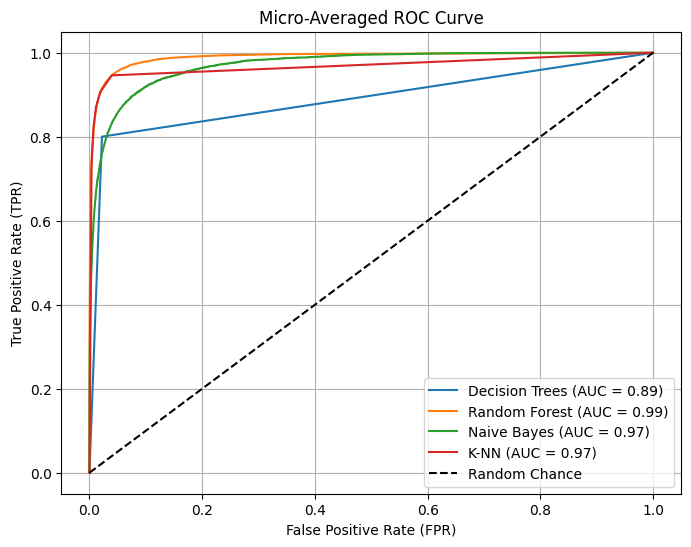

In [15]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_pred_probs = dt_classifier.predict_proba(X_test_pca)
dt_fpr, dt_tpr, _ = roc_curve(y_test_bin.ravel(), dt_pred_probs.ravel())
dt_auc = auc(dt_fpr, dt_tpr)

# For Random Forest
rf_pred_probs = rf_classifier.predict_proba(X_test_pca)
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin.ravel(), rf_pred_probs.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

# For Naive Bayes
nb_pred_probs = nb_classifier.predict_proba(X_test_pca)
nb_fpr, nb_tpr, _ = roc_curve(y_test_bin.ravel(), nb_pred_probs.ravel())
nb_auc = auc(nb_fpr, nb_tpr)

# For K-NN
knn_pred_probs = knn_classifier.predict_proba(X_test_pca)
knn_fpr, knn_tpr, _ = roc_curve(y_test_bin.ravel(), knn_pred_probs.ravel())
knn_auc = auc(knn_fpr, knn_tpr)


# Plot micro-averaged ROC curves for each classifier
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Trees (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(knn_fpr, knn_tpr, label='K-NN (AUC = {:.2f})'.format(knn_auc))
#plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.show()



This code will produce the micro-averaged ROC curves and calculate the micro-average AUC for each classifier. The micro-averaged ROC curve represents the overall performance of the classifiers on the multi-class classification problem.

# To calculate the macro-average ROC curve and AUC for each class, we need to loop over all classes, treat each class as the positive class, and create binary ROC curves and AUCs for that class. Then, we take the average of all the class-specific AUCs to get the macro-average AUC.

In [16]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_auc_scores = []
for class_idx in range(10):
    dt_pred_probs = dt_classifier.predict_proba(X_test_pca)[:, class_idx]
    dt_fpr, dt_tpr, _ = roc_curve(y_test_bin[:, class_idx], dt_pred_probs)
    dt_auc = auc(dt_fpr, dt_tpr)
    dt_auc_scores.append(dt_auc)

# For Random Forest
rf_auc_scores = []
for class_idx in range(10):
    rf_pred_probs = rf_classifier.predict_proba(X_test_pca)[:, class_idx]
    rf_fpr, rf_tpr, _ = roc_curve(y_test_bin[:, class_idx], rf_pred_probs)
    rf_auc = auc(rf_fpr, rf_tpr)
    rf_auc_scores.append(rf_auc)

# For Naive Bayes
nb_auc_scores = []
for class_idx in range(10):
    nb_pred_probs = nb_classifier.predict_proba(X_test_pca)[:, class_idx]
    nb_fpr, nb_tpr, _ = roc_curve(y_test_bin[:, class_idx], nb_pred_probs)
    nb_auc = auc(nb_fpr, nb_tpr)
    nb_auc_scores.append(nb_auc)

# For K-NN
knn_auc_scores = []
for class_idx in range(10):
    knn_pred_probs = knn_classifier.predict_proba(X_test_pca)[:, class_idx]
    knn_fpr, knn_tpr, _ = roc_curve(y_test_bin[:, class_idx], knn_pred_probs)
    knn_auc = auc(knn_fpr, knn_tpr)
    knn_auc_scores.append(knn_auc)

# For SVM
#svm_auc_scores = []
#for class_idx in range(10):
    #svm_pred_probs = svm_classifier.decision_function(X_test_pca)[:, class_idx]
    #svm_fpr, svm_tpr, _ = roc_curve(y_test_bin[:, class_idx], svm_pred_probs)
    #svm_auc = auc(svm_fpr, svm_tpr)
    #svm_auc_scores.append(svm_auc)

# Calculate macro-average AUCs
dt_macro_auc = sum(dt_auc_scores) / len(dt_auc_scores)
rf_macro_auc = sum(rf_auc_scores) / len(rf_auc_scores)
nb_macro_auc = sum(nb_auc_scores) / len(nb_auc_scores)
knn_macro_auc = sum(knn_auc_scores) / len(knn_auc_scores)
#svm_macro_auc = sum(svm_auc_scores) / len(svm_auc_scores)

# Print macro-average AUCs
print("Decision Trees Macro-Averaged AUC:", dt_macro_auc)
print("Random Forest Macro-Averaged AUC:", rf_macro_auc)
print("Naive Bayes Macro-Averaged AUC:", nb_macro_auc)
print("K-NN Macro-Averaged AUC:", knn_macro_auc)
#print("SVM Macro-Averaged AUC:", svm_macro_auc)


Decision Trees Macro-Averaged AUC: 0.8889999999999999
Random Forest Macro-Averaged AUC: 0.9890117500000001
Naive Bayes Macro-Averaged AUC: 0.9723018777777778
K-NN Macro-Averaged AUC: 0.9676803666666667


In this code, we loop over each class (0 to 9) and calculate the ROC curve and AUC individually for each classifier. The AUC scores for each class are stored in separate lists (dt_auc_scores, rf_auc_scores, nb_auc_scores, knn_auc_scores, and svm_auc_scores). Then, we calculate the macro-average AUC by taking the average of the AUC scores for all classes.

The macro-average AUC provides an overall measure of classifier performance that considers the performance on each class equally. It's useful when you want to evaluate how well the classifiers perform across all classes in the multi-class classification problem.

# To produce ROC curves for each classifier (Decision Trees, Random Forest, Naive Bayes, and K-NN), ROC curves are commonly used for binary classifiers, but in the multi-class case, you can generate a ROC curve by treating each class as the positive class and the rest as the negative class (One-vs-Rest strategy).


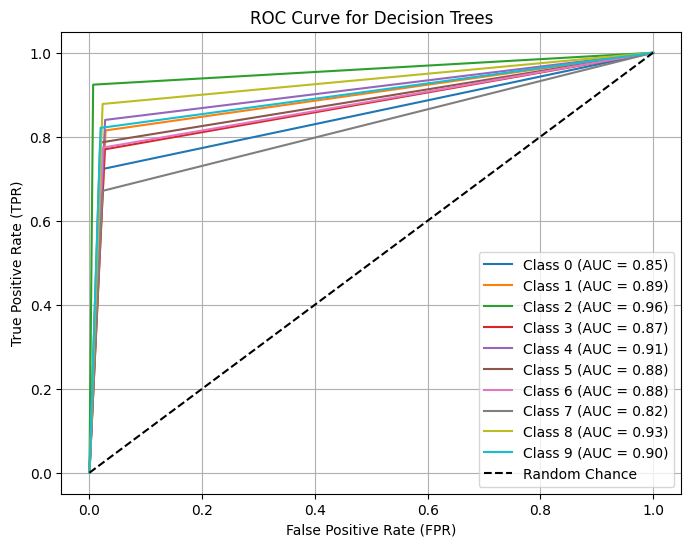

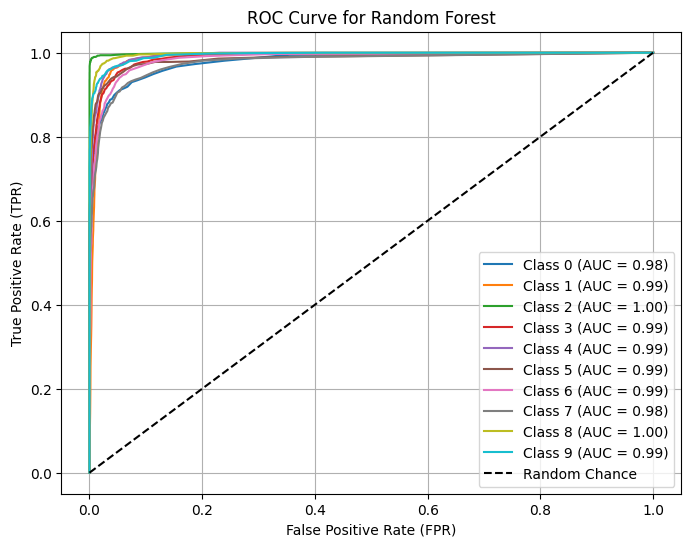

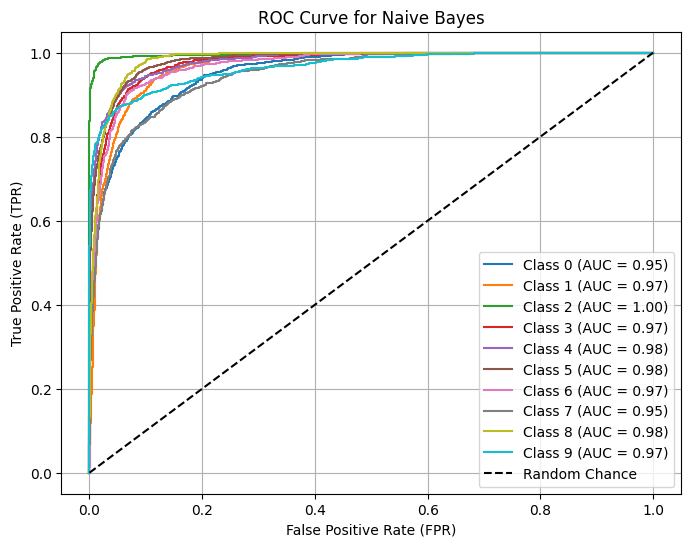

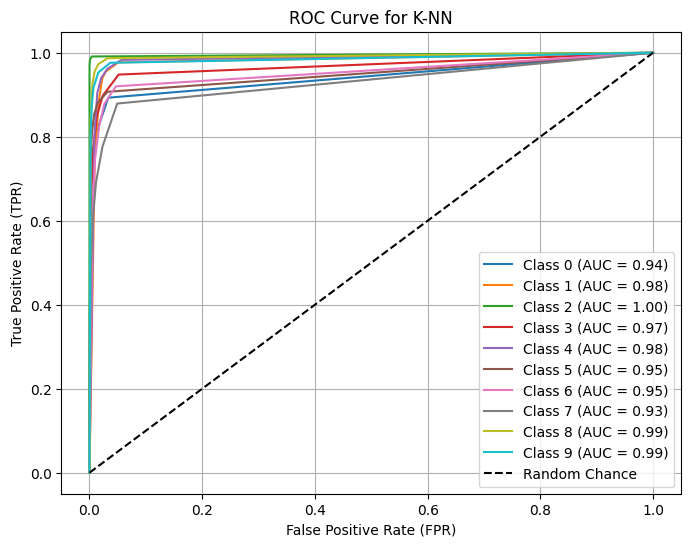

In [17]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for class_idx in range(10):
    dt_pred_probs = dt_classifier.predict_proba(X_test_pca)[:, class_idx]
    dt_fpr[class_idx], dt_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], dt_pred_probs)
    dt_auc[class_idx] = auc(dt_fpr[class_idx], dt_tpr[class_idx])

# For Random Forest
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()
for class_idx in range(10):
    rf_pred_probs = rf_classifier.predict_proba(X_test_pca)[:, class_idx]
    rf_fpr[class_idx], rf_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], rf_pred_probs)
    rf_auc[class_idx] = auc(rf_fpr[class_idx], rf_tpr[class_idx])

# For Naive Bayes
nb_fpr = dict()
nb_tpr = dict()
nb_auc = dict()
for class_idx in range(10):
    nb_pred_probs = nb_classifier.predict_proba(X_test_pca)[:, class_idx]
    nb_fpr[class_idx], nb_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], nb_pred_probs)
    nb_auc[class_idx] = auc(nb_fpr[class_idx], nb_tpr[class_idx])

# For K-NN
knn_fpr = dict()
knn_tpr = dict()
knn_auc = dict()
for class_idx in range(10):
    knn_pred_probs = knn_classifier.predict_proba(X_test_pca)[:, class_idx]
    knn_fpr[class_idx], knn_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], knn_pred_probs)
    knn_auc[class_idx] = auc(knn_fpr[class_idx], knn_tpr[class_idx])

# Plot ROC curves for each class for Decision Trees
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(dt_fpr[class_idx], dt_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, dt_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Trees')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Random Forest
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(rf_fpr[class_idx], rf_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, rf_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Naive Bayes
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(nb_fpr[class_idx], nb_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, nb_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for K-NN
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(knn_fpr[class_idx], knn_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, knn_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for K-NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


With this code, you will generate separate ROC curves for each classifier (Decision Trees, Random Forest, Naive Bayes, and K-NN) for each class in the multi-class classification problem. The ROC curves for each class will be plotted individually to help you analyze the classifier's performance for each class.